In [2]:
import numpy as np
import scipy
from scipy import integrate
from numpy import linalg as LA
import matplotlib.pyplot as plt

### defining functions

In [3]:
def coupled_fitzhugh(var, t, param):
    '''
    var : vector of variables
        vars = [v1, w1, v2, w2]
        
    t : time
        
    param : vector of parameters
        param = [a1, b1, c1, I1, d21, a2, b2, c2, I2, d12]
    '''
    
    v1, w1, v2, w2 = var
    a1, b1, c1, I1, d21, a2, b2, c2, I2, d12 = param
    
    dv1 = -v1**3+(1+a1)*v1**2-a1*v1-w1+I1+d12*v2
    dw1 = b1*v1
    
    dv2 = -v2**3+(1+a2)*v2**2-a2*v2-w2+I2+d21*v1
    dw2 = b2*v2
    
    return np.array([dv1,dw1,dv2,dw2])



#define constants
a1=0.05
b1=0.01
c1=0.01
I1=0.1
d12=0

a2=0.25
b2=0.01
c2=0.01
I2=0.1
d21=0

#define intit cond
v1=2
w1=0
v2=2
w2=0

# ODE solver parameters
abserr = 0.0025*1.0e-1  #to minick ode15 
relerr = 0.0025*1.0e-5  #to minick ode15
stoptime = 0.5
numpoints = 201

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [a1, b1, c1, I1, d21, a2, b2, c2, I2, d12]
w0 = [v1, w1, v2, w2]

# Call the ODE solver.
wsol = integrate.odeint(coupled_fitzhugh, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

#write solution array
A11 = np.c_[wsol[:,0:1],wsol[:,2:3],wsol[:,1:2],wsol[:,3:4]]
np.savetxt('A11.dat', A11)

### Seperate Runs

In [7]:
#set up f1
r1 = integrate.ode(coupled_fitzhugh).set_integrator('vode', method='bdf', order=15)  # set integrator similiar to ODE45
r1.set_initial_value(w0, t)     # initial values

#integrator loop
for i in range(1, len(t)):
    r1.set_f_params(p,)
    y1[i, :] = r1.integrate(t[i])    # get one more value, add it to the array
    if not r1.successful():
        raise RuntimeError("Could not integrate")        

p_1 = y1[:,0:1]
v_1 = y1[:,1:2]

TypeError: 'float' object is not iterable

### Coupled Run

In [ ]:
#create figure object
fig = plt.figure()

#plot each set of y values with respect to time
ax = fig.add_axes([0,0,1,1])

ax.plot(t,p_1, label = 'Position')
ax.plot(t,v_1, label = 'Velocity')

#title axis
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_title('Excercise 4-1: Part A - No Forcing')

#include legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

NameError: name 'p_2' is not defined

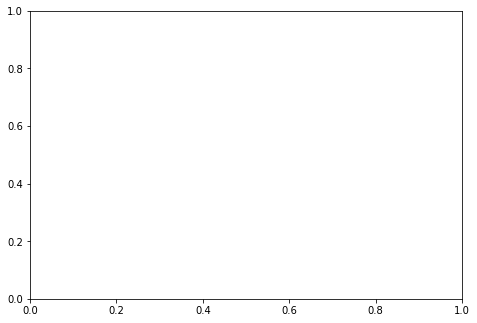

In [5]:
#create figure object
fig = plt.figure()

#plot each set of y values with respect to time
ax = fig.add_axes([0,0,1,1])

ax.plot(t,p_2, label = 'Position')
ax.plot(t,v_2, label = 'Velocity')

#title axis
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_title('Excercise 4-1: Part A - No Forcing')

#include legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()